In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import nltk
import sklearn
from tensorflow import keras
from keras.preprocessing.text import text_to_word_sequence
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to C:\Users\ROG
[nltk_data]     SCAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ROG
[nltk_data]     SCAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ROG SCAR\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Users\ROG
[nltk_data]     SCAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\ROG
[nltk_data]     SCAR\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [8]:
df=pd.read_csv("BBC News.csv")
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [9]:
df.isna().sum()

ArticleId    0
Text         0
Category     0
dtype: int64

In [10]:
target_category = df['Category'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


In [11]:
df['Category_id'] = df.Category.factorize()[0]

In [12]:
df.head(20)

,ArticleId,Text,Category,Category_id
0,1833,worldcom ex-boss launches defence lawyers defe...,business,0
1,154,german business confidence slides german busin...,business,0
2,1101,bbc poll indicates economic gloom citizens in ...,business,0
3,1976,lifestyle governs mobile choice faster bett...,tech,1
4,917,enron bosses in $168m payout eighteen former e...,business,0
5,1582,howard truanted to play snooker conservative...,politics,2
6,651,wales silent on grand slam talk rhys williams ...,sport,3
7,1797,french honour for director parker british film...,entertainment,4
8,2034,car giant hit by mercedes slump a slump in pro...,business,0
9,1866,fockers fuel festive film chart comedy meet th...,entertainment,4


2.Data Preprocessing

In [13]:
category = df[["Category","Category_id"]].drop_duplicates().sort_values('Category_id')
category

,Category,Category_id
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


In [14]:
df.groupby('Category').Category_id.count()

Category
business         336
entertainment    273
politics         274
sport            346
tech             261
Name: Category_id, dtype: int64

<AxesSubplot:xlabel='Category'>

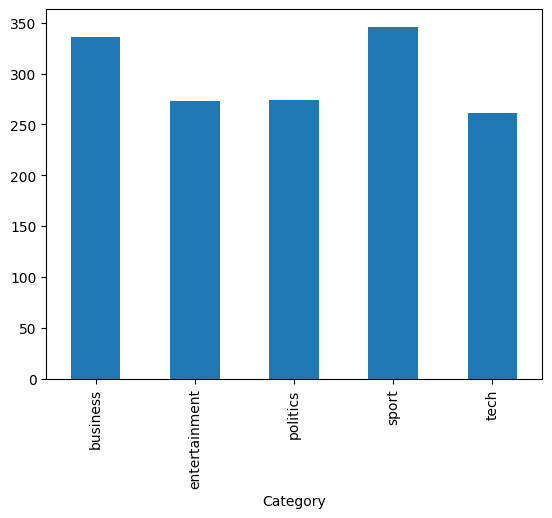

In [15]:
df.groupby('Category').Category_id.count().plot.bar(ylim=0)

In [16]:
text = df["Text"]
text.head(n=25)

0     worldcom ex-boss launches defence lawyers defe...
1     german business confidence slides german busin...
2     bbc poll indicates economic gloom citizens in ...
3     lifestyle  governs mobile choice  faster  bett...
4     enron bosses in $168m payout eighteen former e...
5     howard  truanted to play snooker  conservative...
6     wales silent on grand slam talk rhys williams ...
7     french honour for director parker british film...
8     car giant hit by mercedes slump a slump in pro...
9     fockers fuel festive film chart comedy meet th...
10    blair rejects iraq advice calls tony blair has...
11    housewives lift channel 4 ratings the debut of...
12    uk coal plunges into deeper loss shares in uk ...
13    bp surges ahead on high oil price oil giant bp...
14    ireland 21-19 argentina an injury-time dropped...
15    wenger signs new deal arsenal manager arsene w...
16    u2 s desire to be number one u2  who have won ...
17    hantuchova in dubai last eight daniela han

In [17]:
category.head()

,Category,Category_id
0,business,0
3,tech,1
5,politics,2
6,sport,3
7,entertainment,4


What is Stemming

In [18]:
def preprocessDataset(train_text):
       
    #word tokenization using text-to-word-sequence
    train_text= str(train_text)
    tokenized_train_set = text_to_word_sequence(train_text,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',lower=True,split=" ")
        
    #stop word removal
    stop_words = set(stopwords.words('english'))
    stopwordremove = [i for i in tokenized_train_set if not i in stop_words]
        
     
    #join words into sentence
    stopwordremove_text = ' '.join(stopwordremove)
        
        
    #remove numbers
    numberremove_text = ''.join(c for c in stopwordremove_text if not c.isdigit())
    #--Stemming--
    stemmer= PorterStemmer()

    stem_input=nltk.word_tokenize(numberremove_text)
    stem_text=' '.join([stemmer.stem(word) for word in stem_input])
    lemmatizer = WordNetLemmatizer()

    def get_wordnet_pos(word):
        """Map POS tag to first character lemmatize() accepts"""
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

        return tag_dict.get(tag, wordnet.NOUN)

    lem_input = nltk.word_tokenize(stem_text)
    lem_text= ' '.join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in lem_input])
    return lem_text

In [19]:

df['Text'] = df['Text'].apply(preprocessDataset)
text = df['Text']
category = df['Category']
text.head()

0    worldcom ex bos launch defenc lawyer defend fo...
1    german busi confid slide german busi confid fe...
2    bbc poll indic econom gloom citizen major nati...
3    lifestyl govern mobil choic faster well funkie...
4    enron bos m payout eighteen former enron direc...
Name: Text, dtype: object

Split train set

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(text,category, test_size = 0.3, random_state = 60,shuffle=True, stratify=category)

In [21]:
nb = Pipeline([('tfidf', TfidfVectorizer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train,Y_train)

test_predict = nb.predict(X_test)

train_accuracy = round(nb.score(X_train,Y_train)*100)
test_accuracy =round(accuracy_score(test_predict, Y_test)*100)


print("Naive Bayes Train Accuracy Score : {}% ".format(train_accuracy ))
print("Naive Bayes Test Accuracy Score  : {}% ".format(test_accuracy ))
print()
print(classification_report(test_predict, Y_test, target_names=target_category))

Naive Bayes Train Accuracy Score : 99% 
Naive Bayes Test Accuracy Score  : 96% 

               precision    recall  f1-score   support

     business       0.98      0.94      0.96       105
         tech       0.93      1.00      0.96        76
     politics       0.93      0.94      0.93        81
        sport       1.00      0.98      0.99       106
entertainment       0.96      0.95      0.96        79

     accuracy                           0.96       447
    macro avg       0.96      0.96      0.96       447
 weighted avg       0.96      0.96      0.96       447

